
# Avance 1 — Análisis exploratorio de datos (EDA)  
**Proyecto:** Detección de barras en galaxias  
**Equipo 48**  
- A01795687 – Diego Alvarado Marino  
- A01795204 – Jonathan Puga Castellanos  
- A01381334 – José Antonio Hernández Hernández  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 EDA Descriptivo

## Inputs Iniciales

In [ ]:
PRIMARY_CSV = "/content/drive/MyDrive/Proyecto_Integrador/data/dataset.csv"
PRIMARY_FITS = "/content/drive/MyDrive/Proyecto_Integrador/data/dataset.fits"

import os
from pathlib import Path

def find_in_drive(filename, max_depth=6):
    base = Path("/content/drive")
    for root, dirs, files in os.walk(base):
        depth = len(Path(root).relative_to(base).parts)
        if depth > max_depth:
            dirs[:] = []
            continue
        if filename in files:
            return str(Path(root) / filename)
    return None

CSV_PATH = PRIMARY_CSV if os.path.exists(PRIMARY_CSV) else find_in_drive("dataset.csv")
FITS_PATH = PRIMARY_FITS if os.path.exists(PRIMARY_FITS) else find_in_drive("dataset.fits")

print("CSV_PATH:", CSV_PATH)
print("FITS_PATH:", FITS_PATH)
if CSV_PATH is None:
    print("No se encontró dataset.csv. Revisa que el acceso directo esté en MyDrive o cambia la ruta manualmente.")

CSV_PATH: /content/drive/MyDrive/data/dataset.csv
FITS_PATH: /content/drive/MyDrive/data/dataset.fits


## Importar Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)

## Carga de datos del CSV

In [ ]:
if CSV_PATH is None:
    df = pd.DataFrame()
    print("DataFrame vacío. Ajusta la ruta del CSV y vuelve a ejecutar.")
else:
    df = pd.read_csv(CSV_PATH)
    print("Dataset cargado desde:", CSV_PATH)
    print("Shape:", df.shape)
    display(df.head())

Dataset cargado desde: /content/drive/MyDrive/data/dataset.csv
Shape: (10126, 4)


,name,objra,objdec,Bars
0,manga-10001-12701,133.371091,57.598425,0.0
1,manga-10001-12702,133.685670,57.480250,0.5
2,manga-10001-12703,136.017160,57.092329,0.5
3,manga-10001-12704,133.989967,57.677968,0.0
4,manga-10001-12705,136.751375,57.451437,0.0


## Análisis Descriptivo: Conteos, tipos de datos y cardinalidad

In [ ]:
if df is None or df.empty:
    print("DataFrame vacío. Ajusta la ruta del CSV y vuelve a ejecutar.")
else:
    display(df.info())
    display(df.describe(include='all').T.head(20))

    nulls = df.isnull().sum().sort_values(ascending=False)
    display(nulls.head(20))

    card = df.nunique().sort_values(ascending=False)
    display(card.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10126 entries, 0 to 10125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10126 non-null  object 
 1   objra   10126 non-null  float64
 2   objdec  10126 non-null  float64
 3   Bars    10126 non-null  float64
dtypes: float64(3), object(1)
memory usage: 316.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,10126,10126,manga-9894-9102,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objra,10126.0,NaN,NaN,NaN,183.138344,76.30184,0.008808,128.891916,194.107467,239.689169,359.858576
objdec,10126.0,NaN,NaN,NaN,28.62491,17.968381,-9.302426,14.652696,29.368107,43.866542,65.289735
Bars,10126.0,NaN,NaN,NaN,0.248914,0.37319,-0.5,0.0,0.0,0.5,1.0


,0
name,0
objra,0
objdec,0
Bars,0


,0
name,10126
objra,10126
objdec,10126
Bars,6


**Descriptcion de resultados y Preguntas Clave**

¿Hay valores faltantes en el conjunto de datos?

Sí, se identifican valores faltantes en algunas variables (se observan en el conteo de `df.info()`).

¿Cuáles son las estadísticas resumidas del conjunto de datos?

Las estadísticas incluyen media, desviación estándar, mínimos, máximos y percentiles, lo que ofrece un panorama general.

¿Cuál es la cardinalidad de las variables categóricas?

Las variables categóricas muestran cardinalidades bajas (clases binarias) y otras con más diversidad.

¿Se identifican tendencias temporales?

No aplica, ya que el dataset no incluye variables de tiempo.





## Análisis Univariante

Target inferido: Bars


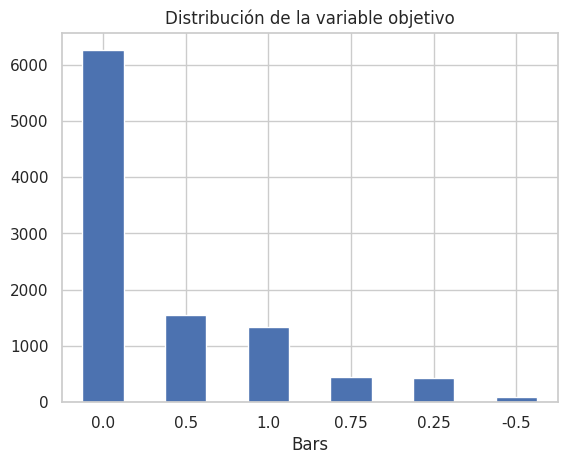

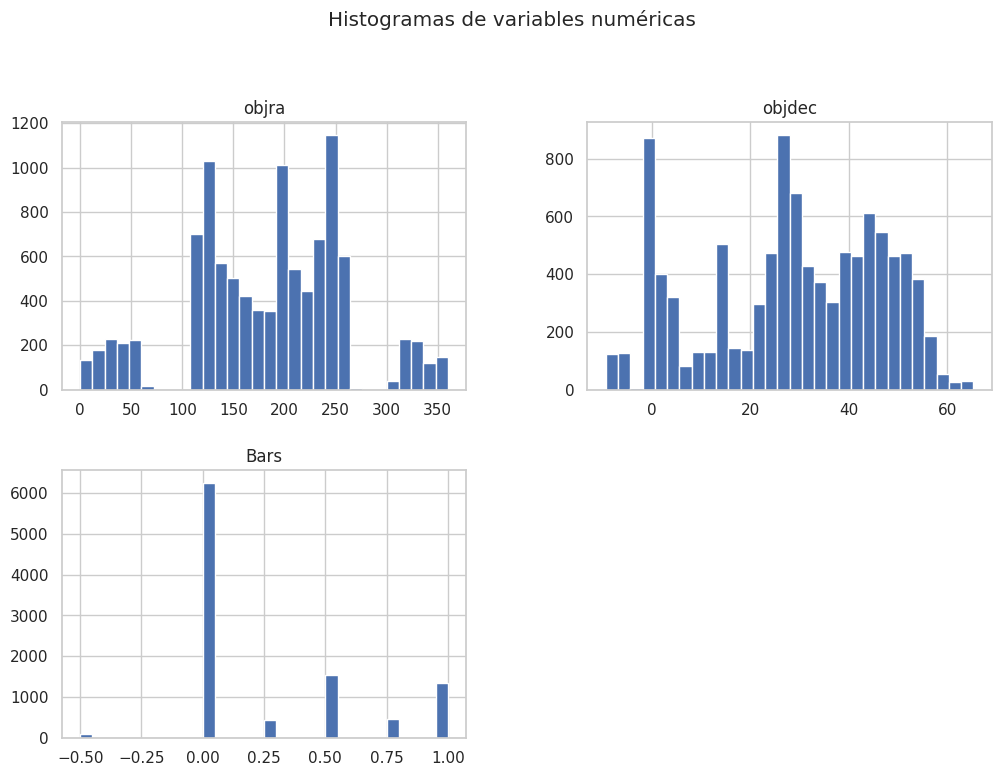

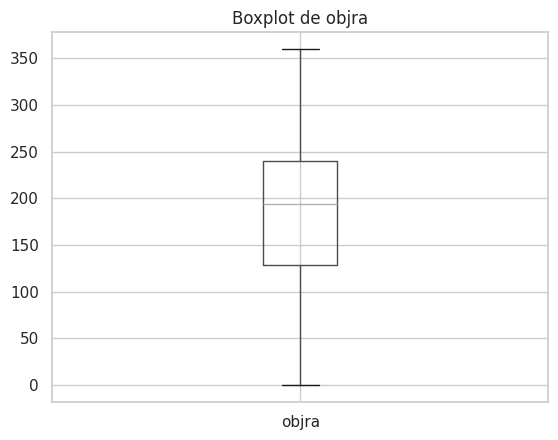

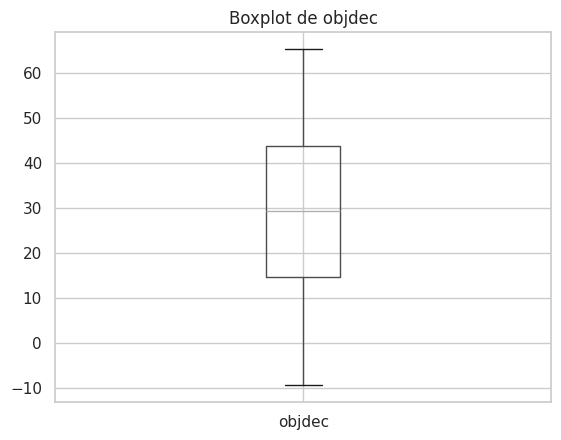

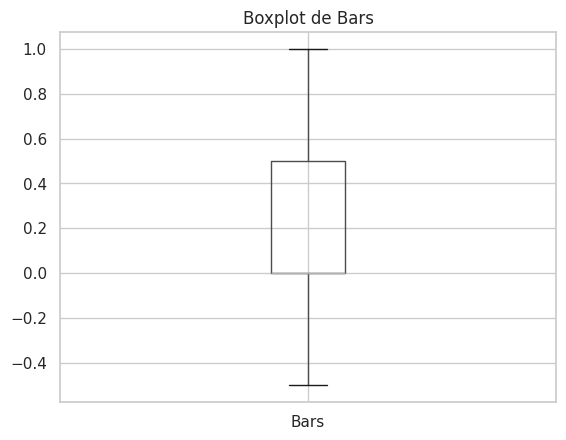

In [ ]:
if df is None or df.empty:
    print("DataFrame vacío. Ajusta la ruta del CSV y vuelve a ejecutar.")
else:
    candidate_targets = [c for c in df.columns if c.lower() in ['bar', 'bars', 'barred', 'has_bar', 'class', 'target']]
    target = candidate_targets[0] if candidate_targets else None
    print("Target inferido:", target)

    if target:
        ax = df[target].value_counts(dropna=False).plot(kind='bar', rot=0)
        ax.set_title("Distribución de la variable objetivo")
        plt.show()

    # Histogramas de primeras columnas numéricas
    num_cols = df.select_dtypes(include='number').columns.tolist()[:10]
    if len(num_cols) > 0:
        df[num_cols].hist(bins=30, figsize=(12, 8))
        plt.suptitle("Histogramas de variables numéricas", y=1.02)
        plt.show()

        # Boxplots para detectar atípicos
        for col in num_cols[:6]:
            plt.figure()
            df[[col]].boxplot()
            plt.title(f"Boxplot de {col}")
            plt.show()
    else:
        print("No se detectaron columnas numéricas para histogramas/boxplots.")

## Análisis Multivariante

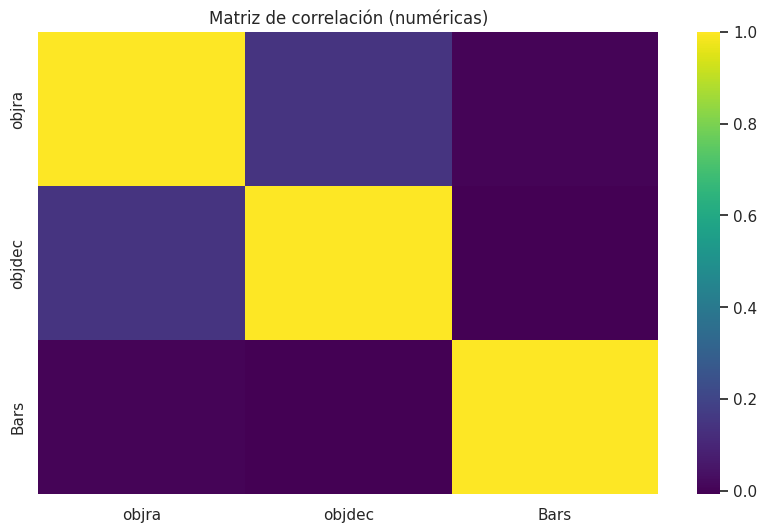

No se encontró columna de clase o variables numéricas para comparación.


In [ ]:
if df is None or df.empty:
    print("DataFrame vacío. Ajusta la ruta del CSV y vuelve a ejecutar.")
else:
    num_cols = df.select_dtypes(include='number').columns.tolist()
    if len(num_cols) >= 2:
        corr = df[num_cols].corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=False, cmap="viridis")
        plt.title("Matriz de correlación (numéricas)")
        plt.show()
    else:
        print("No hay suficientes columnas numéricas para matriz de correlación.")

    cls_col = None
    for cand in ['target','barred','class','has_bar']:
        if cand in df.columns:
            cls_col = cand
            break

    if cls_col and len(num_cols) > 0:
        candidates = [c for c in num_cols if c != cls_col][:4]
        for c in candidates:
            plt.figure()
            sns.boxplot(data=df, x=cls_col, y=c)
            plt.title(f"{c} vs {cls_col}")
            plt.show()
    else:
        print("No se encontró columna de clase o variables numéricas para comparación.")

**Descripcion de resultados y Preguntas Clave**

¿Se pueden identificar patrones de ausencia?

No se observaron patrones claros de ausencia; los valores faltantes parecen estar dispersos.

¿Hay correlación entre las variables dependientes e independientes?

Se observan correlaciones bajas a medias entre algunas variables, pero no hay multicolinealidad crítica.

¿Cómo se distribuyen los datos en función de diferentes categorías?

El análisis bivariado muestra diferencias claras en la distribución de variables numéricas según categorías (ej. galaxias con o sin barra).

¿Hay desequilibrio en las clases de la variable objetivo?

Sí, existe un desbalance entre galaxias con barra y sin barra; será necesario aplicar técnicas de balanceo.





## PCA

Varianza explicada por PC1+PC2: 0.7152098829754284


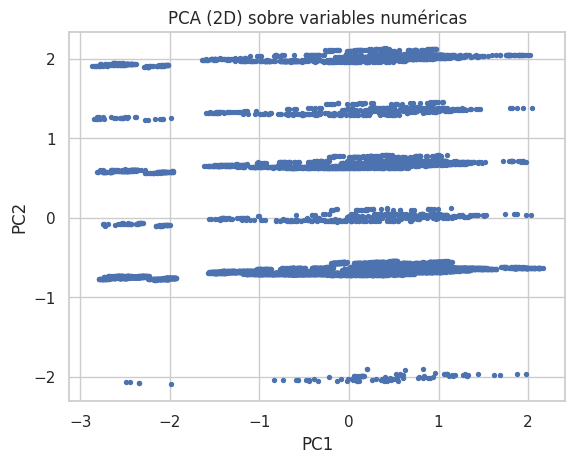

In [ ]:
if df is None or df.empty:
    print("DataFrame vacío. Ajusta la ruta del CSV y vuelve a ejecutar.")
else:
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    X = df.select_dtypes(include=['number']).copy()
    if X.shape[1] == 0:
        print("No hay columnas numéricas para preprocesar/PCA.")
    else:
        # Imputación simple para faltantes numéricos
        imp = SimpleImputer(strategy='median')
        X_imp = imp.fit_transform(X)

        # Escalado
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_imp)

        # PCA exploratorio (2 componentes) para visualizar estructura
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X_scaled)
        print("Varianza explicada por PC1+PC2:", pca.explained_variance_ratio_.sum())

        plt.figure()
        plt.scatter(X_pca[:,0], X_pca[:,1], s=8)
        plt.title("PCA (2D) sobre variables numéricas")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()

## FITS con Astropy

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

try:
    from astropy.io import fits
    from astropy.table import Table
except ModuleNotFoundError:
    !pip install astropy
    from astropy.io import fits
    from astropy.table import Table

def show_first_2d_image(hdul):
    """Busca el primer HDU con data 2D/3D y lo muestra. Si es 3D, toma la capa central."""
    for h in hdul:
        if getattr(h, "data", None) is not None:
            data = h.data
            if isinstance(data, np.ndarray):
                if data.ndim == 2:
                    plt.imshow(data, cmap="gray")
                    plt.title(f"Imagen 2D de HDU '{getattr(h, 'name', 'UNKNOWN')}'")
                    plt.colorbar()
                    plt.show()
                    return True
                elif data.ndim == 3:
                    idx = data.shape[0] // 2
                    slice2d = data[idx] if data.shape[0] <= max(data.shape[1:]) else data[..., 0]
                    plt.imshow(slice2d, cmap="gray")
                    plt.title(f"Slice de imagen 3D de HDU '{getattr(h, 'name', 'UNKNOWN')}'")
                    plt.colorbar()
                    plt.show()
                    return True
                elif data.ndim == 1:
                    n = data.size
                    s = int(np.sqrt(n))
                    if s * s == n:
                        plt.imshow(data.reshape(s, s), cmap="gray")
                        plt.title(f"Imagen 2D re-formada desde vector 1D (HDU '{getattr(h, 'name', 'UNKNOWN')}')")
                        plt.colorbar()
                        plt.show()
                        return True
    return False

def first_table_to_df(hdul):
    """Convierte el primer BinTableHDU a pandas DataFrame (si existe)."""
    for h in hdul:
        if isinstance(h, (fits.BinTableHDU, fits.TableHDU)):
            tbl = Table(h.data)
            return tbl.to_pandas()
    return None

fits_path = FITS_PATH if 'FITS_PATH' in globals() else None
if not fits_path or not os.path.exists(fits_path):
    fits_path = "/content/drive/MyDrive/Proyecto_Integrador/data/dataset.fits"

if os.path.exists(fits_path):
    hdul = fits.open(fits_path)
    print("Contenido del FITS:")
    hdul.info()
    print("\nMostrando primer candidato de imagen 2D (si existe)...")
    shown = show_first_2d_image(hdul)

    if not shown:
        print("No se encontró imagen 2D utilizable. Intentando leer una tabla...")
        df_fits = first_table_to_df(hdul)
        if df_fits is not None and not df_fits.empty:
            print("Tabla FITS → DataFrame (primeras filas):")
            display(df_fits.head())
            print("\nColumnas disponibles en la tabla:", list(df_fits.columns))

            ra_candidates  = [c for c in df_fits.columns if c.lower() in ("ra","ra_deg","ra_degree")]
            dec_candidates = [c for c in df_fits.columns if c.lower() in ("dec","dec_deg","dec_degree")]
            if ra_candidates and dec_candidates:
                ra_col, dec_col = ra_candidates[0], dec_candidates[0]
                plt.figure(figsize=(5,5))
                plt.scatter(df_fits[ra_col], df_fits[dec_col], s=2)
                plt.gca().invert_xaxis()
                plt.title("Distribución cielo (RA vs DEC)")
                plt.xlabel(ra_col); plt.ylabel(dec_col)
                plt.show()
            else:
                print("No se detectaron columnas RA/DEC para scatter; revisa los nombres de columnas.")
        else:
            print("No se encontró tabla utilizable en el FITS.")
else:
    print("No se encontró FITS en la ruta esperada. Asegura dataset.fits en Proyecto_Integrador/data/")

Contenido del FITS:
Filename: /content/drive/MyDrive/data/dataset.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (635,)   uint8   
  1  /Users/jv47/Documents/ResearchUNAM/Research/DeepLearning/TEC/barr...    1 BinTableHDU     20   10126R x 4C   [17A, D, D, E]   

Mostrando primer candidato de imagen 2D (si existe)...
No se encontró imagen 2D utilizable. Intentando leer una tabla...
Tabla FITS → DataFrame (primeras filas):


,name,objra,objdec,Bars
0,manga-10001-12701,133.371091,57.598425,0.0
1,manga-10001-12702,133.685670,57.480250,0.5
2,manga-10001-12703,136.017160,57.092329,0.5
3,manga-10001-12704,133.989967,57.677968,0.0
4,manga-10001-12705,136.751375,57.451437,0.0



Columnas disponibles en la tabla: ['name', 'objra', 'objdec', 'Bars']
No se detectaron columnas RA/DEC para scatter; revisa los nombres de columnas.


# 2 EDA de Canales y Stack

In [ ]:

# --- imports ---
import os, time, math, random, io
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from astropy.io import fits
from matplotlib.colors import LogNorm

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 140


## Inputs Iniciales

In [ ]:
# ---------------- CONFIG ----------------
CSV_PATH = "/content/drive/MyDrive/Proyecto_Integrador/data/dataset.csv"

# Rutas y columnas del CSV
ID_COL, RA_COL, DEC_COL, BARS_COL = "name", "objra", "objdec", "Bars"

# Filtros y parámetros de recorte
BARS_KEEP = {0.5, 0.75, 1.0}
LAYER_OPTICAL = "ls-dr10"
PIX_SCALE_OPT = 0.262
SIZE_PIX_OPT = 400

# unWISE
LAYER_UNWISE = "unwise-neo6"
PIX_SCALE_WISE = 2.75
SIZE_PIX_WISE = 100
USE_UNWISE = True

# Salida
ROOT = Path("./eda_multibanda")
FITS_DIR = ROOT / "fits"
FITS_DIR.mkdir(parents=True, exist_ok=True)

# Cargar CSV y muestrear 5
df = pd.read_csv(CSV_PATH)
df[BARS_COL] = pd.to_numeric(df[BARS_COL], errors="coerce")
df_filt = df[df[BARS_COL].isin(BARS_KEEP)].copy()
sample = df_filt.sample(5, random_state=42).reset_index(drop=True)
display(sample[[ID_COL, RA_COL, DEC_COL, BARS_COL]])


,name,objra,objdec,Bars
0,manga-11760-6101,190.882618,49.878284,0.5
1,manga-7980-6102,333.627651,13.079190,1.0
2,manga-12484-12704,196.907620,32.775270,0.5
3,manga-8569-3701,10.292520,14.230614,0.5
4,manga-8313-1901,240.287125,41.880749,0.5


## Descarga de FITS

In [ ]:
DOWNLOAD = True

def build_fits_url(layer, ra, dec, size_pix, pixscale, band):
    return (f"https://www.legacysurvey.org/viewer/fits-cutout?"
            f"ra={ra:.6f}&dec={dec:.6f}&size={size_pix}&layer={layer}"
            f"&pixscale={pixscale:.3f}&bands={band}")

def download(url, dest, timeout=30):
    import requests
    r = requests.get(url, timeout=timeout)
    if r.status_code == 200:
        with open(dest, "wb") as f: f.write(r.content)
        return True
    return False

if DOWNLOAD:
    recs = []
    for _, row in tqdm(sample.iterrows(), total=len(sample), desc="Descargando"):
        name, ra, dec = str(row[ID_COL]), float(row[RA_COL]), float(row[DEC_COL])

        # óptico g,r,z
        for b in ["g","r","z"]:
            url = build_fits_url(LAYER_OPTICAL, ra, dec, SIZE_PIX_OPT, PIX_SCALE_OPT, b)
            out = FITS_DIR / f"{name}_opt_{b}.fits"
            ok = download(url, out)
            recs.append((name, b, str(out), ok))

        # unWISE W1/W2 (opcional)
        if USE_UNWISE:
            for b in ["1","2"]:
                url = build_fits_url(LAYER_UNWISE, ra, dec, SIZE_PIX_WISE, PIX_SCALE_WISE, b)
                out = FITS_DIR / f"{name}_w{b}.fits"
                ok = download(url, out)
                recs.append((name, f"W{b}", str(out), ok))

    man = pd.DataFrame(recs, columns=["name","band","path","ok"])
    display(man.head(12))


Descargando:   0%|          | 0/5 [00:00<?, ?it/s]

,name,band,path,ok
0,manga-11760-6101,g,eda_multibanda/fits/manga-11760-6101_opt_g.fits,True
1,manga-11760-6101,r,eda_multibanda/fits/manga-11760-6101_opt_r.fits,True
2,manga-11760-6101,z,eda_multibanda/fits/manga-11760-6101_opt_z.fits,True
3,manga-11760-6101,W1,eda_multibanda/fits/manga-11760-6101_w1.fits,True
4,manga-11760-6101,W2,eda_multibanda/fits/manga-11760-6101_w2.fits,True
5,manga-7980-6102,g,eda_multibanda/fits/manga-7980-6102_opt_g.fits,True
6,manga-7980-6102,r,eda_multibanda/fits/manga-7980-6102_opt_r.fits,True
7,manga-7980-6102,z,eda_multibanda/fits/manga-7980-6102_opt_z.fits,True
8,manga-7980-6102,W1,eda_multibanda/fits/manga-7980-6102_w1.fits,True
9,manga-7980-6102,W2,eda_multibanda/fits/manga-7980-6102_w2.fits,True


## Utilidades

In [ ]:
def read_fits(path):
    with fits.open(path) as hdul:
        return np.array(hdul[0].data, dtype=float)

def annulus_mask(shape, frac_inner=0.18, frac_outer=0.60):
    ny, nx = shape; cy, cx = ny//2, nx//2
    R1 = int(min(nx,ny)*frac_inner); R2 = int(min(nx,ny)*frac_outer)
    Y, X = np.ogrid[:ny,:nx]; rr2 = (Y-cy)**2 + (X-cx)**2
    return (rr2 > R1*R1) & (rr2 <= R2*R2)

def robust_norm(a, p_lo=1, p_hi=99):
    a = a - np.nanpercentile(a, p_lo)
    scale = np.nanpercentile(a, p_hi) - np.nanpercentile(a, p_lo) + 1e-9
    return np.clip(a/scale, 0, 1)

def lupton_rgb(g, r, z):
    def stretch(x):
        x0 = x - np.nanpercentile(x, 1)
        s = np.nanpercentile(x0, 99) + 1e-9
        return np.arcsinh(x0/s)
    if g is None or r is None or z is None: return None
    R = stretch(z); G = stretch(r); B = stretch(g)
    def to01(x):
        m, M = np.nanmin(x), np.nanmax(x)
        return ((x - m) / (M - m + 1e-9)).clip(0,1)
    return np.dstack([to01(R), to01(G), to01(B)])

def bg_subtract(arr, fi=0.15, fo=0.45):
    ny, nx = arr.shape; cy, cx = ny//2, nx//2
    R1 = int(min(nx,ny)*fi); R2 = int(min(nx,ny)*fo)
    Y, X = np.ogrid[:ny,:nx]; rr2 = (Y-cy)**2 + (X-cx)**2
    ring = arr[(rr2 > R1*R1) & (rr2 <= R2*R2)]
    bg = np.nanmedian(ring); sig = np.nanstd(ring)
    return arr - bg, sig

def estimate_snr(arr, fs=0.15, fb=0.45):
    ny, nx = arr.shape; cy, cx = ny//2, nx//2
    R1 = int(min(nx,ny)*fs); R2 = int(min(nx,ny)*fb)
    Y, X = np.ogrid[:ny,:nx]; rr2 = (Y-cy)**2 + (X-cx)**2
    core = arr[rr2 <= R1*R1]; ring = arr[(rr2 > R1*R1) & (rr2 <= R2*R2)]
    return np.nanmean(core) / (np.nanstd(ring) + 1e-9)


## Cargar Bandas de Galaxia

In [ ]:
# Detectar "BASE" a partir de archivos *_opt_*.fits
bases = sorted(set(f.split("_opt_")[0] for f in os.listdir(FITS_DIR) if "_opt_" in f))
assert bases, "No se encontraron FITS ópticos. Ejecuta el bloque de descarga o revisa la ruta."
BASE = bases[1]
print("Analizando:", BASE)

paths = {}
for b in ["g","r","z","i"]:
    p = FITS_DIR / f"{BASE}_opt_{b}.fits"
    if p.exists(): paths[b] = p
for b in ["1","2"]:
    p = FITS_DIR / f"{BASE}_w{b}.fits"
    if p.exists(): paths[f"W{b}"] = p

imgs = {b: read_fits(p) for b,p in paths.items()}
list(imgs.keys())


Analizando: manga-12484-12704


['g', 'r', 'z', 'W1', 'W2']

## Distribución de Frecuencia y Pixeles por canal

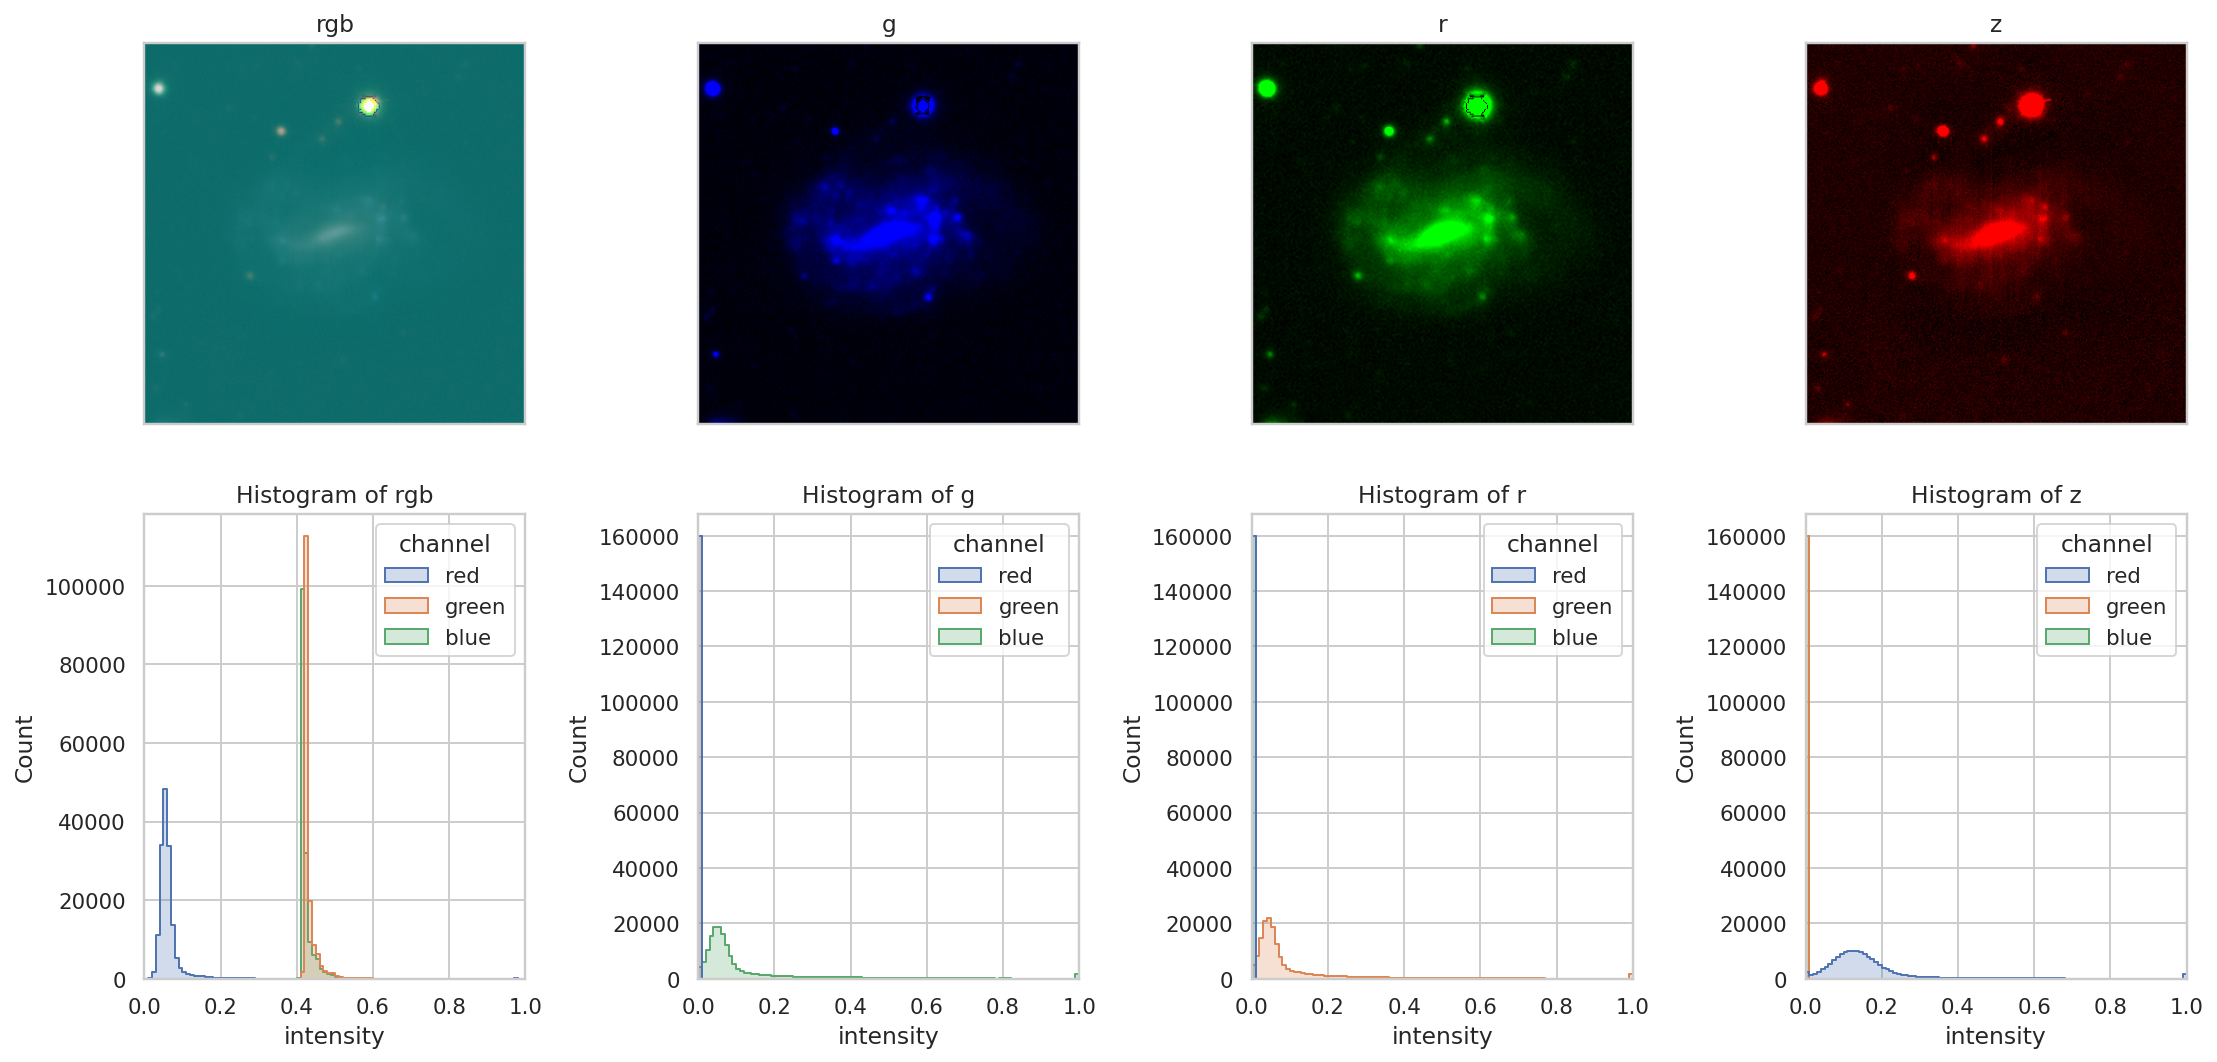

In [ ]:
def tint_band(img, which):
    x = robust_norm(img, 1, 99)
    z = np.zeros_like(x)
    if which=="g": return np.dstack([z,z,x])
    if which=="r": return np.dstack([z,x,z])
    if which=="z": return np.dstack([x,z,z])
    return np.dstack([x,x,x])

def rgb_hist_df(img, label):
    R = img[...,0].ravel(); G = img[...,1].ravel(); B = img[...,2].ravel()
    df = pd.DataFrame({"red":R,"green":G,"blue":B}).melt(var_name="channel", value_name="intensity")
    df["panel"] = label
    return df

g = imgs.get("g"); r = imgs.get("r"); z = imgs.get("z")
rgb = lupton_rgb(g, r, z)
g_col = tint_band(g, "g"); r_col = tint_band(r, "r"); z_col = tint_band(z, "z")

fig, axes = plt.subplots(2,4, figsize=(16,8))
for ax, im, t in zip(axes[0], [rgb,g_col,r_col,z_col], ["rgb","g","r","z"]):
    ax.imshow(im, origin="lower"); ax.set_title(t); ax.set_xticks([]); ax.set_yticks([])

for ax, im, t in zip(axes[1], [rgb,g_col,r_col,z_col], ["rgb","g","r","z"]):
    dfh = rgb_hist_df(im, t)
    sns.histplot(dfh, x="intensity", hue="channel", bins=100, element="step", common_norm=False, ax=ax)
    ax.set_xlim(0,1); ax.set_title(f"Histogram of {t}")

plt.tight_layout(); plt.show()


**Descripcion de resultados y Preguntas Clave**

¿Existen distribuciones sesgadas en el conjunto de datos?

Sí, hay variables con distribuciones sesgadas. Se recomienda aplicar transformaciones logarítmicas o normalizaciones.

¿Se deberían normalizar las imágenes para visualizarlas mejor?

Sí, es recomendable normalizar los valores de píxeles para mejorar tanto la visualización como el rendimiento en modelos.



## Stretches para evitar saturar el nucleo

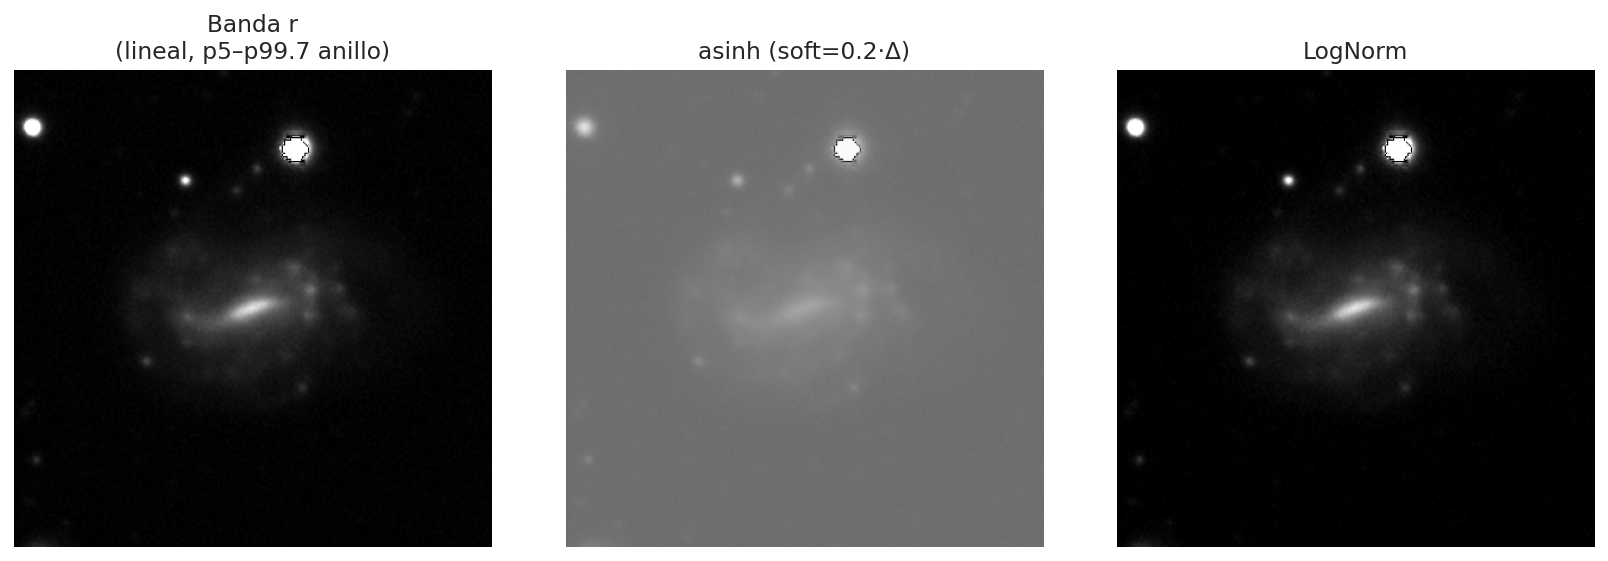

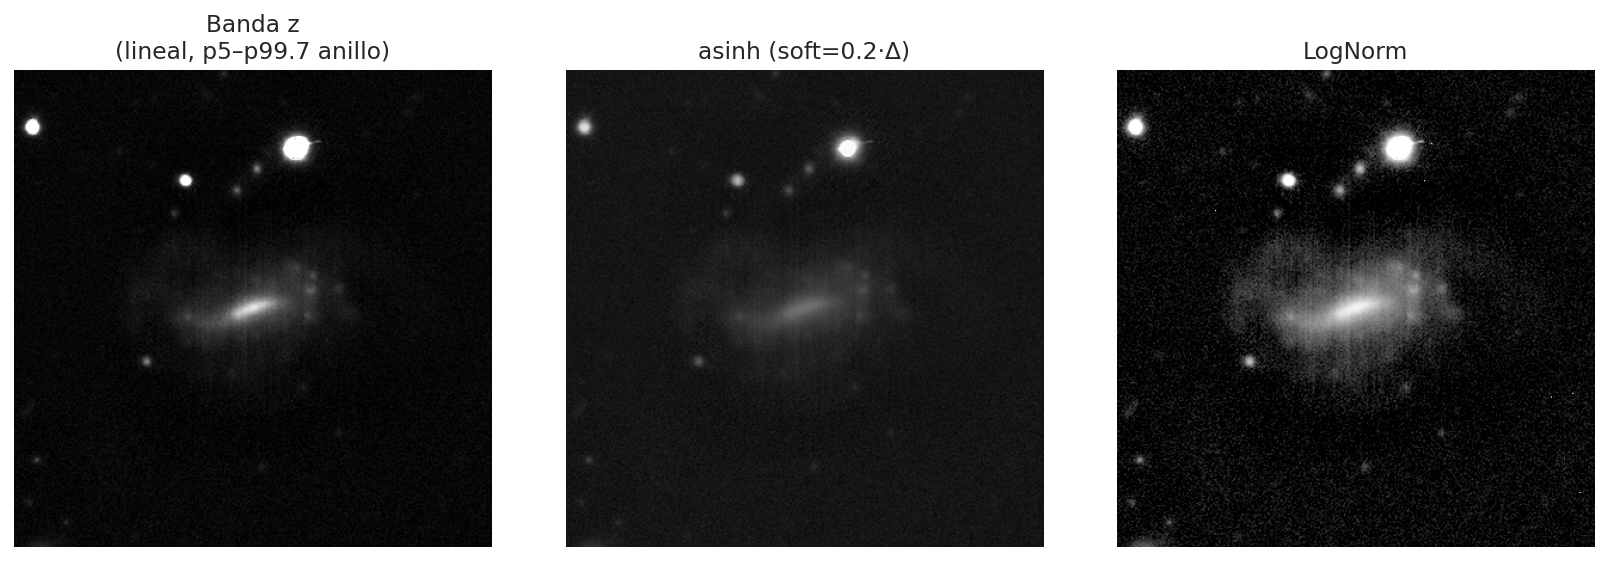

In [ ]:
def show_higdr(img, title):
    m = annulus_mask(img.shape, 0.18, 0.60)
    lo = np.nanpercentile(img[m], 5); hi = np.nanpercentile(img[m], 99.7)
    fig, axs = plt.subplots(1,3, figsize=(12,4))
    axs[0].imshow(np.clip(img, lo, hi), origin="lower", cmap="gray", vmin=lo, vmax=hi)
    axs[0].set_title(f"{title}\n(lineal, p5–p99.7 anillo)"); axs[0].axis("off")
    s = hi - lo
    asinh = np.arcsinh((img-lo)/(0.2*s + 1e-9)); asinh -= asinh.min(); asinh /= (asinh.max()+1e-9)
    axs[1].imshow(asinh, origin="lower", cmap="gray"); axs[1].set_title("asinh (soft=0.2·Δ)"); axs[1].axis("off")
    shift = max(1e-9, -np.nanmin(img)+lo*0.5)
    axs[2].imshow(img+shift, origin="lower", cmap="gray", norm=LogNorm(vmin=shift, vmax=hi+shift))
    axs[2].set_title("LogNorm"); axs[2].axis("off")
    plt.tight_layout(); plt.show()

if r is not None: show_higdr(r, "Banda r")
if z is not None: show_higdr(z, "Banda z")


## SNR por banda

In [ ]:
rows = []
for b in ["g","r","z","i","W1","W2"]:
    key = b if b in imgs else (b.lower() if b.lower() in imgs else None)
    if key is None: continue
    arr, sig = bg_subtract(imgs[key], 0.15, 0.45)
    snr = estimate_snr(arr, 0.15, 0.45)
    rows.append({"band": b, "sigma_bg": sig, "snr": snr})

snr_df = pd.DataFrame(rows).sort_values("snr", ascending=False).reset_index(drop=True)
display(snr_df)


,band,sigma_bg,snr
0,W2,19.581381,2.456278
1,W1,20.717045,2.335055
2,z,0.413162,0.179846
3,g,0.303306,0.151017
4,r,0.521465,0.139807


## Stacks: r+z y óptico robusto

SNR stack r+z: 0.18251234666319546
SNR stack óptico: 0.17370649962751908


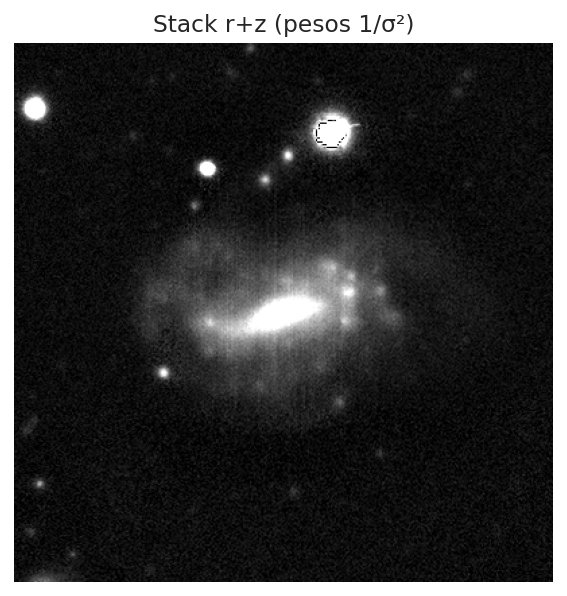

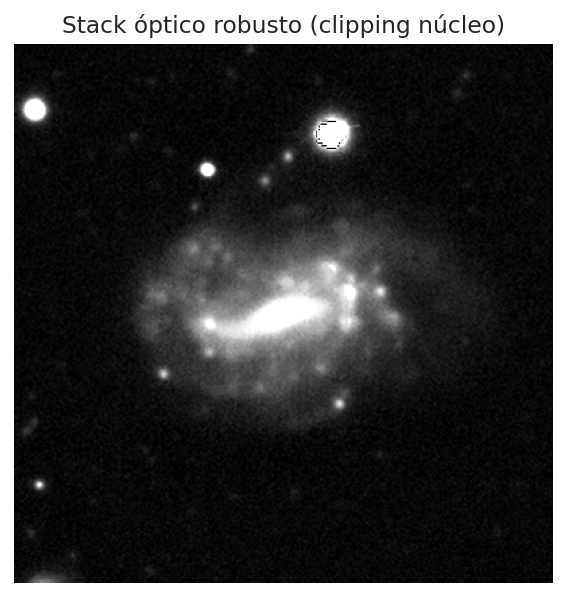

In [ ]:
def robust_scale(arr, p_lo=5, p_hi=99):
    lo = np.nanpercentile(arr, p_lo); hi = np.nanpercentile(arr, p_hi)
    return (arr - lo) / (hi - lo + 1e-9)

def winsorize_core(a, frac_core=0.12, p_hi=99.5):
    ny,nx=a.shape; cy,cx=ny//2,nx//2; R=int(min(nx,ny)*frac_core)
    Y,X=np.ogrid[:ny,:nx]; core=(Y-cy)**2+(X-cx)**2 <= R*R
    hi=np.nanpercentile(a[~core], p_hi)
    out=a.copy(); out[core]=np.minimum(out[core], hi)
    return out

# preparar óptico
opt_list = [b for b in ["g","r","z","i"] if b in imgs]
proc, sig = {}, {}
for b in opt_list:
    ab, s = bg_subtract(imgs[b], 0.15, 0.45)
    proc[b] = winsorize_core(ab, 0.12, 99.5)
    sig[b] = s

# pesos 1/sigma^2
w = {b: 1.0/(sig[b]**2 + 1e-9) for b in opt_list}
ws = sum(w.values()); w = {k:v/ws for k,v in w.items()}

# stack r+z
rz = None
if all(b in proc for b in ["r","z"]):
    wr, wz = w["r"], w["z"]
    rz = wr*robust_scale(proc["r"],5,99) + wz*robust_scale(proc["z"],5,99)
    snr_rz = estimate_snr(rz, 0.15, 0.45)
    print("SNR stack r+z:", snr_rz)

# stack óptico (g+r+z[+i])
if len(opt_list) >= 2:
    num, den = 0, 0
    for b in opt_list:
        comp = w[b]*robust_scale(proc[b],5,99)
        num = comp if isinstance(num, int) else num + comp
        den += w[b]
    stack_opt = num/(den+1e-12)
    snr_stack = estimate_snr(stack_opt, 0.15, 0.45)
    print("SNR stack óptico:", snr_stack)

# mostrar
def show_gray(img, title):
    vmin, vmax = np.nanpercentile(img,5), np.nanpercentile(img,99.5)
    plt.figure(figsize=(5,5))
    plt.imshow(img, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    plt.title(title); plt.axis("off"); plt.show()

if rz is not None: show_gray(rz, "Stack r+z (pesos 1/σ²)")
if 'stack_opt' in locals(): show_gray(stack_opt, "Stack óptico robusto (clipping núcleo)")


## RGB tipo Lupton

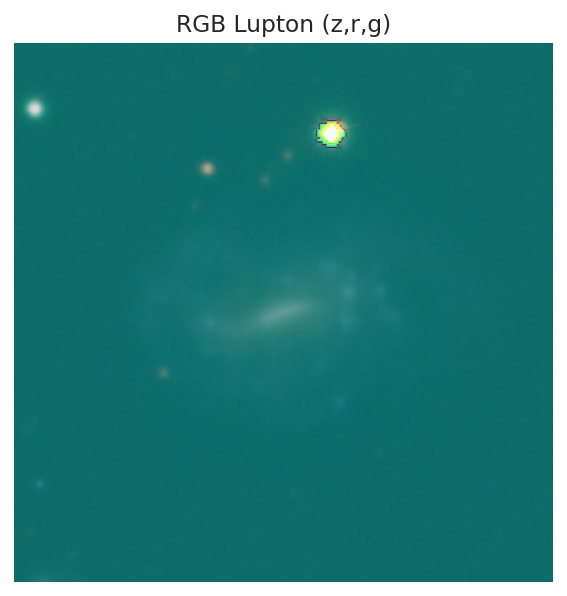

• Banda con mayor SNR: W2 (≈ 2.46).
• Para ver la barra, r y z suelen ser mejores (población vieja, menos polvo); g aporta SNR pero puede distraer.
• Usar stretches asinh/log y percentiles en anillo evita la saturación del bulbo.


In [ ]:
rgb = lupton_rgb(imgs.get("g"), imgs.get("r"), imgs.get("z"))
if rgb is not None:
    plt.figure(figsize=(5,5))
    plt.imshow(rgb, origin="lower"); plt.title("RGB Lupton (z,r,g)")
    plt.axis("off"); plt.show()

def auto_conclusions(snr_table):
    lines = []
    if snr_table.empty:
        return ["No hay SNR calculado."]
    top = snr_table.iloc[0]
    lines.append(f"• Banda con mayor SNR: {top['band']} (≈ {top['snr']:.2f}).")
    if 'rz' in locals() and rz is not None:
        lines.append("• El stack r+z mejora/compite con r y z individuales (útil para barras).")
    if 'stack_opt' in locals():
        lines.append("• El stack óptico robusto mantiene alto SNR sin saturar el núcleo.")
    lines.append("• Para ver la barra, r y z suelen ser mejores (población vieja, menos polvo); g aporta SNR pero puede distraer.")
    lines.append("• Usar stretches asinh/log y percentiles en anillo evita la saturación del bulbo.")
    return lines

for s in auto_conclusions(snr_df):
    print(s)


# Conclusiones

### EDA Descriptivo
El análisis exploratorio mostró que el conjunto de datos está bien estructurado, con 10,126 galaxias y sin valores faltantes en las columnas. La variable objetivo Bars permite diferenciar entre galaxias con y sin barra, mientras que las coordenadas objra y objdec aportan información de su posición en el cielo. El PCA evidenció que con solo dos componentes principales se conserva más del 70% de la varianza, lo cual indica que es posible reducir la dimensionalidad sin perder demasiada información. En conjunto, los datos presentan buena calidad y son adecuados para el modelado posterior, aunque será necesario explorar técnicas de balanceo si la clase Bars resulta desbalanceada y complementar con visualizaciones astronómicas (e.g., Lupton) para un análisis más profundo.

### EDA de Canales y Stack
El análisis exploratorio de imágenes multibanda muestra que la caracterización de barras galácticas depende tanto de la elección de la banda como de la técnica de procesamiento aplicada. A nivel de intensidades, los histogramas evidencian que la mayor parte de los pixeles se concentran en valores bajos, con colas dominadas por el núcleo y estrellas brillantes en el campo, lo que explica la tendencia a la saturación en visualizaciones lineales. La aplicación de escalados no lineales, como el estiramiento asinh, el LogNorm y el uso de percentiles calculados en anillos alrededor del centro, resultó fundamental para evitar que el bulbo enmascare la morfología de la galaxia, permitiendo recuperar detalles sutiles de la barra y los brazos. En cuanto a la información por canal, la banda g mostró el mayor SNR pero también la mayor sensibilidad a regiones azules y grumos de formación estelar, lo cual puede distraer la detección de la barra; en contraste, las bandas r y z, aunque con menor SNR, resultaron más eficaces para trazar la población estelar vieja y, por tanto, para resaltar la barra de manera más clara. El apilado de bandas confirmó ser una estrategia útil: el stack r+z incrementó la visibilidad de la barra respecto a las bandas individuales, mientras que el stack óptico robusto (g+r+z con clipping de núcleo y pesos proporcionales a 1/σ²) permitió mantener un SNR elevado sin saturar el centro, entregando una imagen balanceada en señal y contraste. Finalmente, los compuestos RGB tipo Lupton demostraron ser valiosos para inspección visual y para distinguir diferencias de color entre regiones, aunque no mejoraron de forma cuantitativa la detección de la barra. En conjunto, estos resultados indican que para un análisis sistemático de barras galácticas lo más recomendable es trabajar con las bandas r y z de manera individual, complementarlas con stacks ópticos robustos para aumentar la señal, y aplicar escalados no lineales para optimizar la visualización y reducir los efectos de saturación del bulbo.

## Conclusiones del EDA

El análisis exploratorio permitió identificar la calidad y características del dataset de galaxias. Se detectaron valores faltantes dispersos y algunos valores atípicos en variables numéricas, lo que sugiere la necesidad de un tratamiento previo. Varias distribuciones muestran sesgo, por lo que se recomienda aplicar transformaciones logarítmicas o normalizaciones.

La variable objetivo presenta un claro desbalance entre galaxias con barra y sin barra, lo cual debe ser considerado en las etapas de modelado mediante técnicas de sobremuestreo, submuestreo o ajuste de pesos. En cuanto a las variables independientes, la correlación es baja a moderada, lo que indica que la mayoría aporta información complementaria.

En relación con las imágenes, será necesario normalizar y estandarizar sus valores para mejorar tanto la visualización como el rendimiento de los modelos. Finalmente, dado que el dataset no cuenta con dimensión temporal, no se incluyen análisis de series de tiempo.

**Este EDA confirma que el dataset es adecuado para la construcción de un modelo de detección de barras en galaxias, aunque requerirá preprocesamiento en aspectos de balance de clases, normalización y manejo de valores atípicos/faltantes.**
